In [36]:
from google.colab import files
uploaded = files.upload()

Saving convenient_store_ansi.csv to convenient_store_ansi (2).csv


In [37]:
data = pd.read_csv('convenient_store_ansi.csv',encoding='cp949')
data.head(8) #8줄 확인하기

,area,company,hourly_wage,area1,area2,outlier,name
0,강남구 삼성동,gs25 오크우드점,5600,강남구,삼성동,0,gs25
1,강남구 삼성동,gs25 코엑스점,5700,강남구,삼성동,0,gs25
2,강서구 화곡동,gs25편의점,5600,강서구,화곡동,0,gs25
3,광진구 군자동,gs25,5580,광진구,군자동,0,gs25
4,광진구 중곡동,gs25중곡대원점,5580,광진구,중곡동,0,gs25
5,구로구 구로동,gs25구로동양점,6000,구로구,구로동,0,gs25
6,구로구 구로동,gs25구로동양점,5580,구로구,구로동,0,gs25
7,동대문구 장안동,gs25장안중앙점,5600,동대문구,장안동,0,gs25


In [38]:
data.info() #dataframe 형태 저장 및 레코드수 (177), 컬럼 수(7), 용량 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   area         177 non-null    object
 1   company      177 non-null    object
 2   hourly_wage  177 non-null    int64 
 3   area1        177 non-null    object
 4   area2        177 non-null    object
 5   outlier      177 non-null    int64 
 6   name         177 non-null    object
dtypes: int64(2), object(5)
memory usage: 9.8+ KB


In [39]:
data.describe() #빈도,평균,편차,최소,최대,25/50/75% 확인_숫자에 대해서만 하는 것 같다.

,hourly_wage,outlier
count,177.000000,177.0
mean,5787.627119,0.0
std,352.318646,0.0
min,5580.000000,0.0
25%,5580.000000,0.0
50%,5600.000000,0.0
75%,6000.000000,0.0
max,7500.000000,0.0


In [40]:
data.area.describe()

count         177
unique        117
top       강남구 논현동
freq            7
Name: area, dtype: object

In [41]:
highwage=data[data.hourly_wage>=6000]
highwage.head()

,area,company,hourly_wage,area1,area2,outlier,name
5,구로구 구로동,gs25구로동양점,6000,구로구,구로동,0,gs25
9,성동구 금호동4,gs25 서울숲푸르지오점,6000,성동구,금호동4,0,gs25
13,영등포구 영등포동,gs25,6300,영등포구,영등포동,0,gs25
18,강남구 논현동,세븐일레븐 논현11호점,6200,강남구,논현동,0,7/11
27,강남구 대치동,세븐일레븐 대치3호점,6000,강남구,대치동,0,7/11


In [42]:
highwage=data[(data.hourly_wage>=6000)&(data.area1=='강남구')]
highwage.head()

,area,company,hourly_wage,area1,area2,outlier,name
18,강남구 논현동,세븐일레븐 논현11호점,6200,강남구,논현동,0,7/11
27,강남구 대치동,세븐일레븐 대치3호점,6000,강남구,대치동,0,7/11
29,강남구 논현동,세븐일레븐편의점,7500,강남구,논현동,0,7/11
30,강남구 청담동,세븐일레븐 청담그린점,6500,강남구,청담동,0,7/11
142,강남구 논현동,CU논현한미점,6000,강남구,논현동,0,CU


In [43]:
highwage=data[(data.hourly_wage>=6000)&(data.area1=='강남구')&(data.company.str.contains('세븐일레븐'))]
highwage.head()

,area,company,hourly_wage,area1,area2,outlier,name
18,강남구 논현동,세븐일레븐 논현11호점,6200,강남구,논현동,0,7/11
27,강남구 대치동,세븐일레븐 대치3호점,6000,강남구,대치동,0,7/11
29,강남구 논현동,세븐일레븐편의점,7500,강남구,논현동,0,7/11
30,강남구 청담동,세븐일레븐 청담그린점,6500,강남구,청담동,0,7/11


In [44]:
data['highwage']=data.hourly_wage>6000 #조건문: True,False 로 적용된다. 새로운 컬럼이 생성된다.
data.head()

,area,company,hourly_wage,area1,area2,outlier,name,highwage
0,강남구 삼성동,gs25 오크우드점,5600,강남구,삼성동,0,gs25,False
1,강남구 삼성동,gs25 코엑스점,5700,강남구,삼성동,0,gs25,False
2,강서구 화곡동,gs25편의점,5600,강서구,화곡동,0,gs25,False
3,광진구 군자동,gs25,5580,광진구,군자동,0,gs25,False
4,광진구 중곡동,gs25중곡대원점,5580,광진구,중곡동,0,gs25,False


In [45]:
highwage=data[(data.hourly_wage>=6000)&(data.area1=='강남구')] #새로운 컬럼이 계속 적용되어 있다.
highwage.head()

,area,company,hourly_wage,area1,area2,outlier,name,highwage
18,강남구 논현동,세븐일레븐 논현11호점,6200,강남구,논현동,0,7/11,True
27,강남구 대치동,세븐일레븐 대치3호점,6000,강남구,대치동,0,7/11,False
29,강남구 논현동,세븐일레븐편의점,7500,강남구,논현동,0,7/11,True
30,강남구 청담동,세븐일레븐 청담그린점,6500,강남구,청담동,0,7/11,True
142,강남구 논현동,CU논현한미점,6000,강남구,논현동,0,CU,False


In [46]:
data[data.highwage==True].describe() #True 에 대한 data 특성을 확인한다.

,hourly_wage,outlier
count,25.000000,25.0
mean,6518.000000,0.0
std,343.923441,0.0
min,6100.000000,0.0
25%,6300.000000,0.0
50%,6500.000000,0.0
75%,6500.000000,0.0
max,7500.000000,0.0


In [47]:
data_re=data[data.highwage==True][['area1','hourly_wage']] #True 에 대해 area, hourly_wage 에 대해 정리하고
data_re=data_re.sort_values(by='hourly_wage',ascending=0) #hourly_wage 로 오름차순 정렬한다.
data_re.head(8) #상위 8개만 보인다.

,area1,hourly_wage
173,용산구,7500
29,강남구,7500
160,서대문구,6900
135,중구,6690
37,강서구,6600
172,용산구,6600
30,강남구,6500
53,구로구,6500


In [48]:
data_re.to_csv('data.csv',index='False') #csv로 저장한다. index 는 데이터에 대해 색인 처리를 할 지 옵션 설정을 하는 것으로, True 설정을 하면 열 하나가 추가되고 넘버링된다.

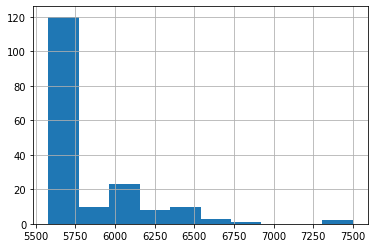

In [49]:
data.hourly_wage.hist(bins=10) #10구간으로 히스토그램 시각화

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


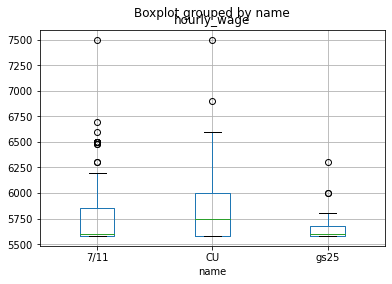

In [50]:
data.boxplot(column='hourly_wage',by='name')

In [54]:
#import matplotlib
#font_name=matplotlib.font_manager.FontProperties(fname='C:/windows/Fonts/Corbel.ttf').get_name()
#matplotlib.rc('font',family=font_name)
#print(font_name) #한글인 경우 폰트 설정이 가능하다는데.. 영어는 안 되나? 다시 확인하기.

FileNotFoundError: ignored